In [1]:
import time
import math
import decimal
import pandas as pd
from pandas import DataFrame
from decimal import Decimal as dec
import seaborn as sns
import numpy as np
from numpy import random as np_rnd
from sklearn.neighbors import KernelDensity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats.distributions import norm
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from IPython.display import Latex

%matplotlib inline

In [2]:
DATASET_PATH = "Datasets/MSFT.csv"

In [3]:
msft_all = pd.read_csv(DATASET_PATH)

TARGET = "Close(t)"
CATEGORIES = "Year"
FEATURES = ["Volume", "Upper_Band", "Lower_Band", "ATR", "ADX", "ROC", "RSI", "SO%K", "STD5"]

# Selection
msft = msft_all[[TARGET, CATEGORIES] + FEATURES]

In [4]:
display(DataFrame.from_records([[a, *msft[a].describe()] for a in msft],\
                               columns=["col", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]))

,col,count,mean,std,min,25%,50%,75%,max
0,Close(t),3732.0,4.837556e+01,4.248472e+01,1.167000e+01,2.120750e+01,2.659000e+01,5.709000e+01,2.165400e+02
1,Year,3732.0,2.012707e+03,4.294933e+00,2.005000e+03,2.009000e+03,2.013000e+03,2.016000e+03,2.020000e+03
2,Volume,3732.0,4.823395e+07,2.981260e+07,7.425600e+06,2.801850e+07,4.244665e+07,6.007778e+07,5.910522e+08
3,Upper_Band,3732.0,5.019215e+01,4.399118e+01,1.371900e+01,2.223819e+01,2.768515e+01,5.806088e+01,2.178106e+02
4,Lower_Band,3732.0,4.558789e+01,3.947749e+01,1.109399e+01,2.010101e+01,2.506921e+01,5.440342e+01,1.991006e+02
5,ATR,3732.0,1.014750e+00,1.224458e+00,2.169258e-01,4.182936e-01,6.081772e-01,9.732348e-01,1.057096e+01
6,ADX,3732.0,2.402441e+01,9.933706e+00,7.483195e+00,1.653219e+01,2.207862e+01,2.975449e+01,6.011188e+01
7,ROC,3732.0,7.656261e-01,4.556153e+00,-2.162962e+01,-1.546220e+00,9.589278e-01,3.391111e+00,2.285208e+01
8,RSI,3732.0,5.446056e+01,1.174035e+01,1.690221e+01,4.653999e+01,5.446991e+01,6.260513e+01,8.924073e+01
9,SO%K,3732.0,5.848742e+01,2.931349e+01,0.000000e+00,3.438993e+01,6.373088e+01,8.415406e+01,1.000000e+02


<AxesSubplot:ylabel='Count'>

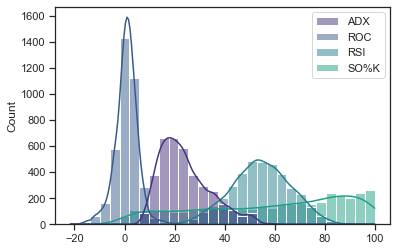

In [5]:
sns.set_theme(style="ticks", palette="viridis")
sns.histplot(msft[["ADX", "ROC", "RSI", "SO%K"]], kde=True)

# Step 1.
<i>You need to make a non-parametric estimation of PDF in form of histogram and using Kernel Density Function for MRV</i><br/>
First define the funciton to print estimations from one column

In [6]:
def display_pdf_info(col):
    plt.figure(figsize=(20,10))
    sns.histplot(data=msft, y=col, x=TARGET, hue=CATEGORIES, palette='Spectral').set_title(f'{col} -> Close(t)')
    plt.show()
    plt.figure(figsize=(20,10))
    sns.kdeplot(data=msft, y=col, x=TARGET, hue=CATEGORIES, palette='Spectral').set_title(f'{col} -> Close(t)')

Apply it to all non-target columns

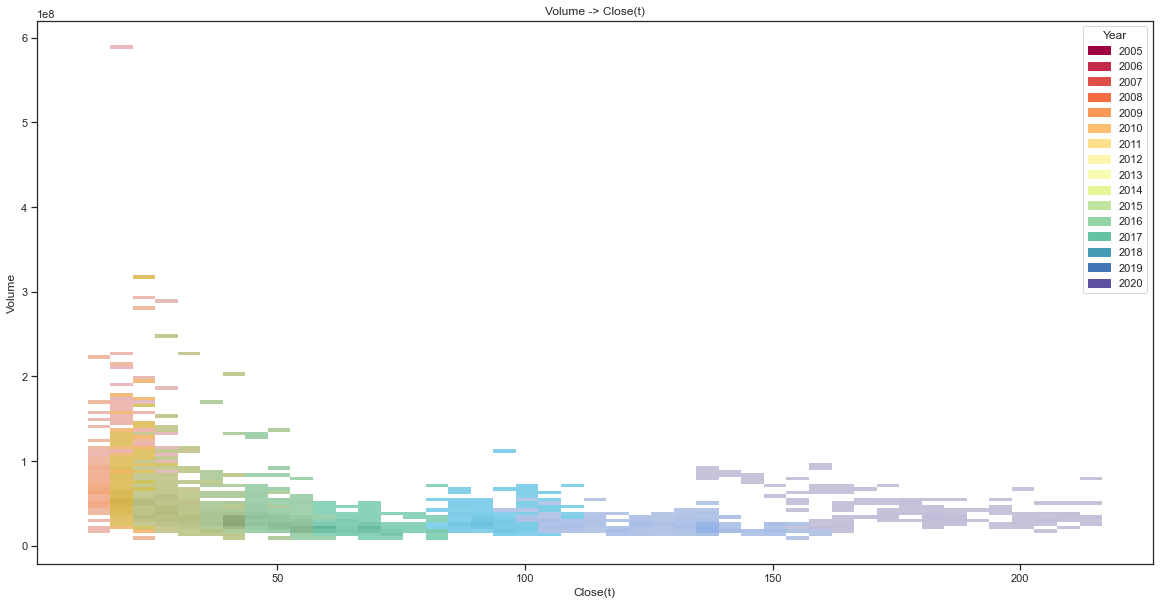

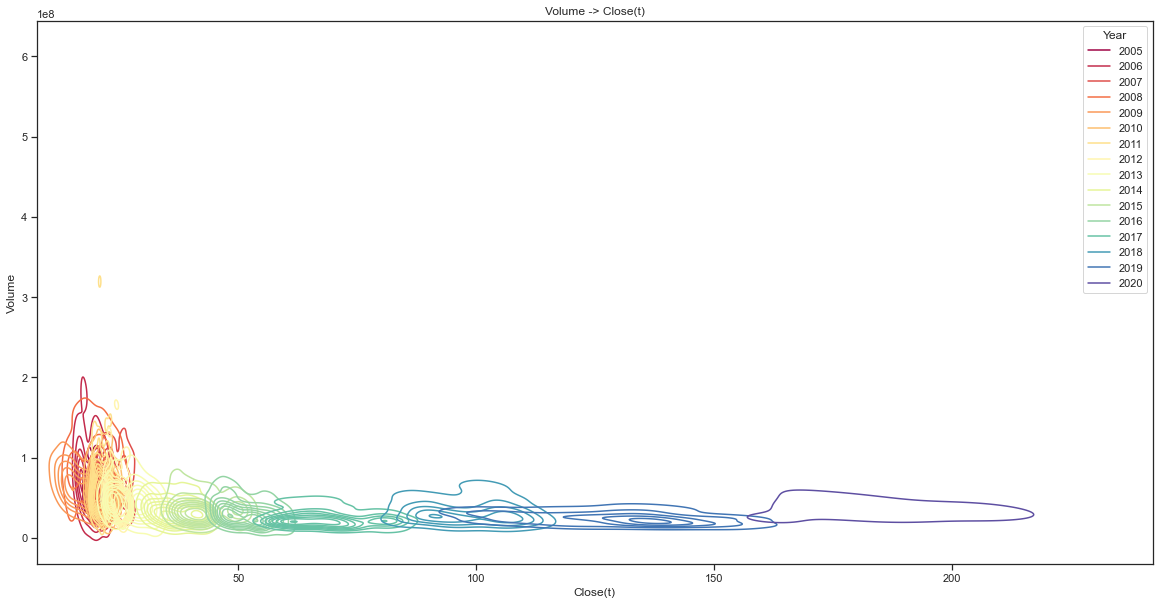

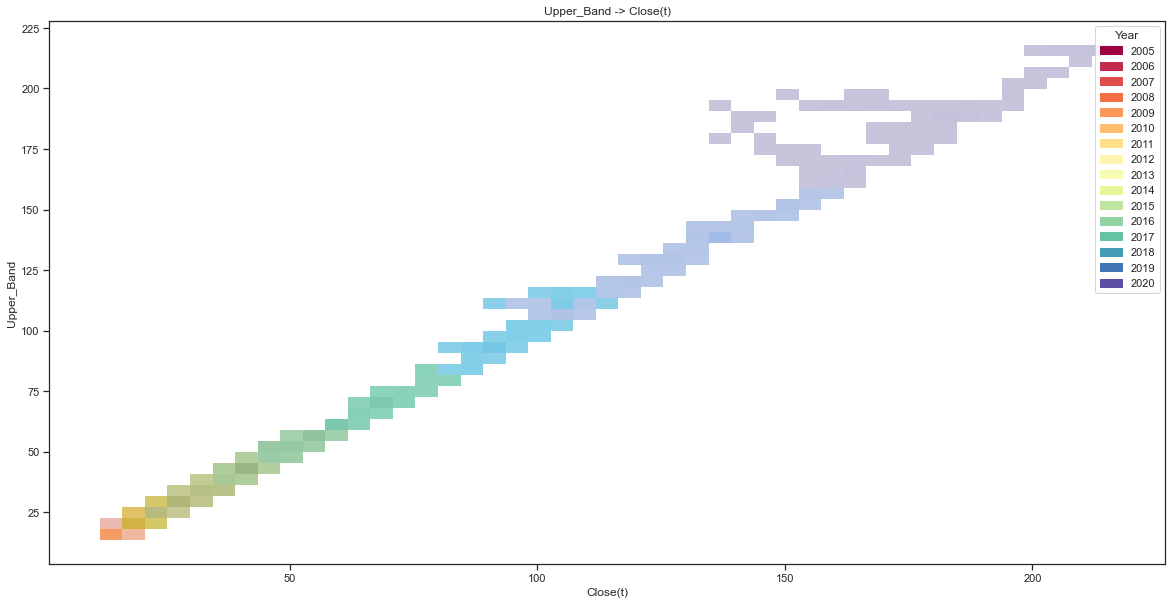

/Users/resurrectiontent/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


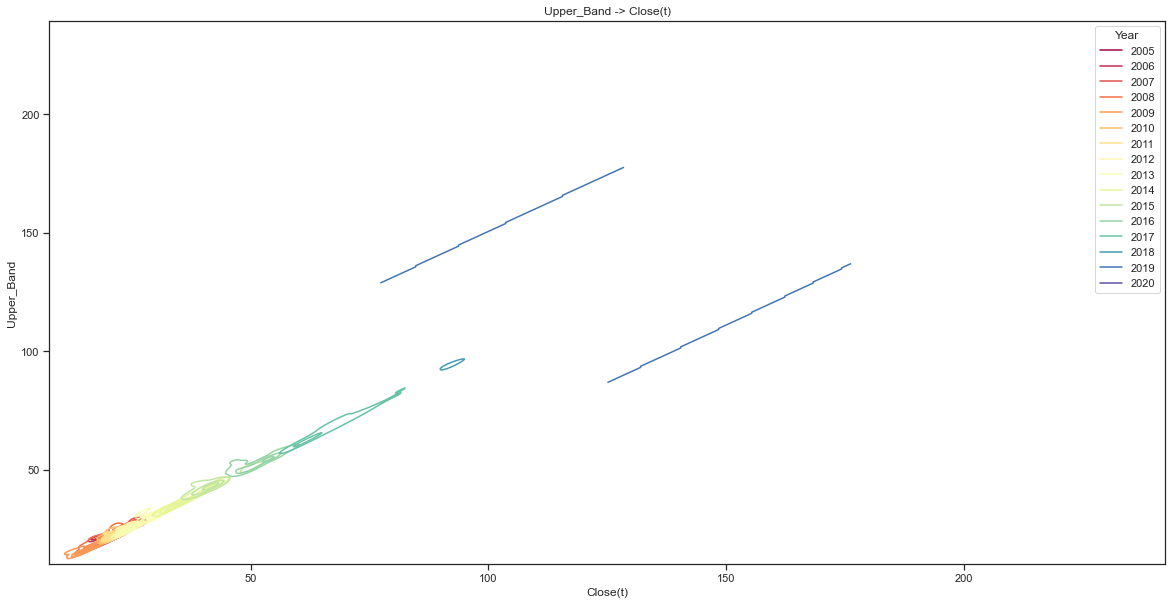

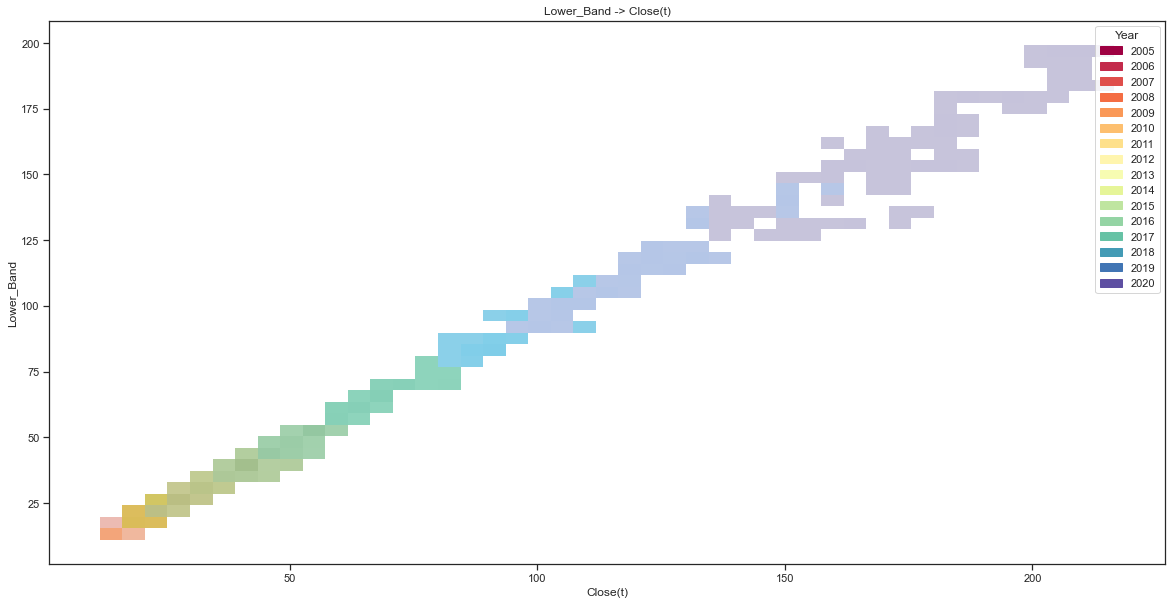

/Users/resurrectiontent/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


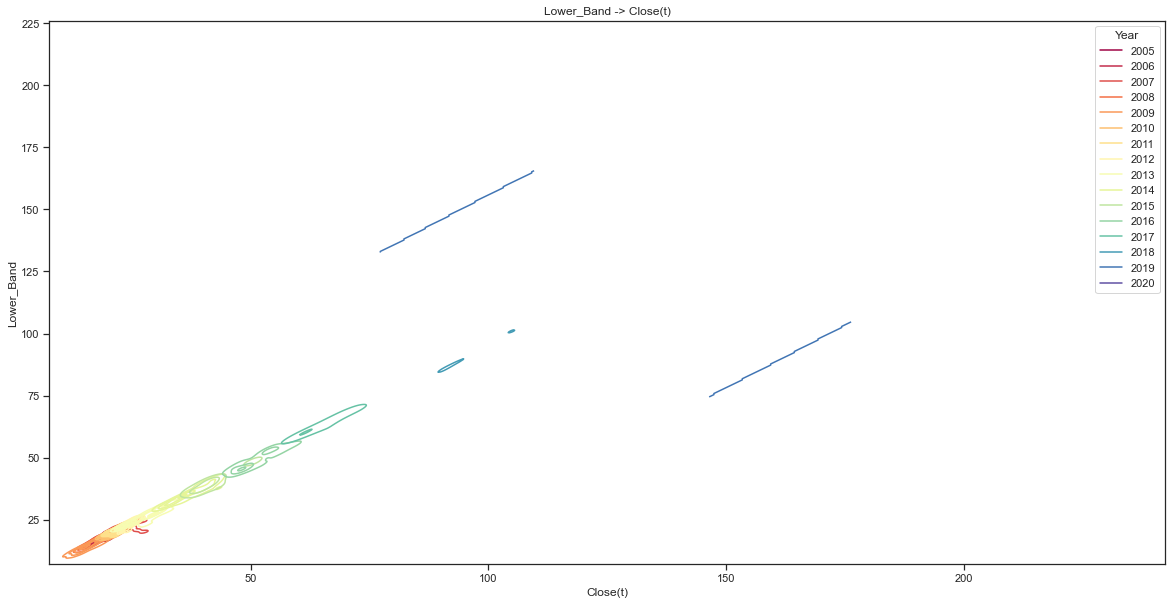

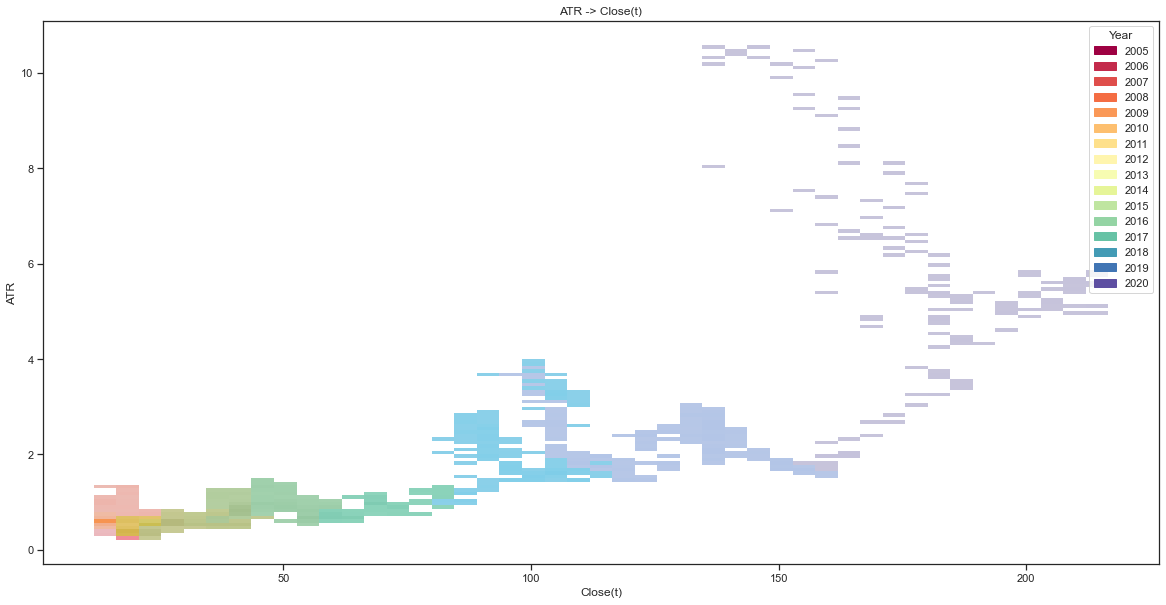

/Users/resurrectiontent/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


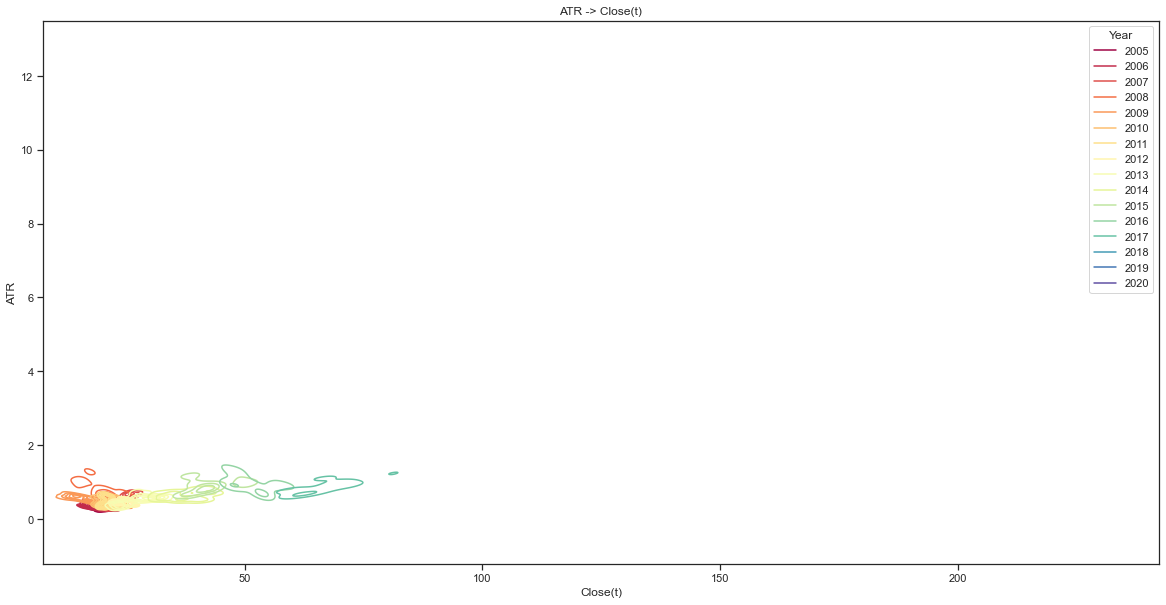

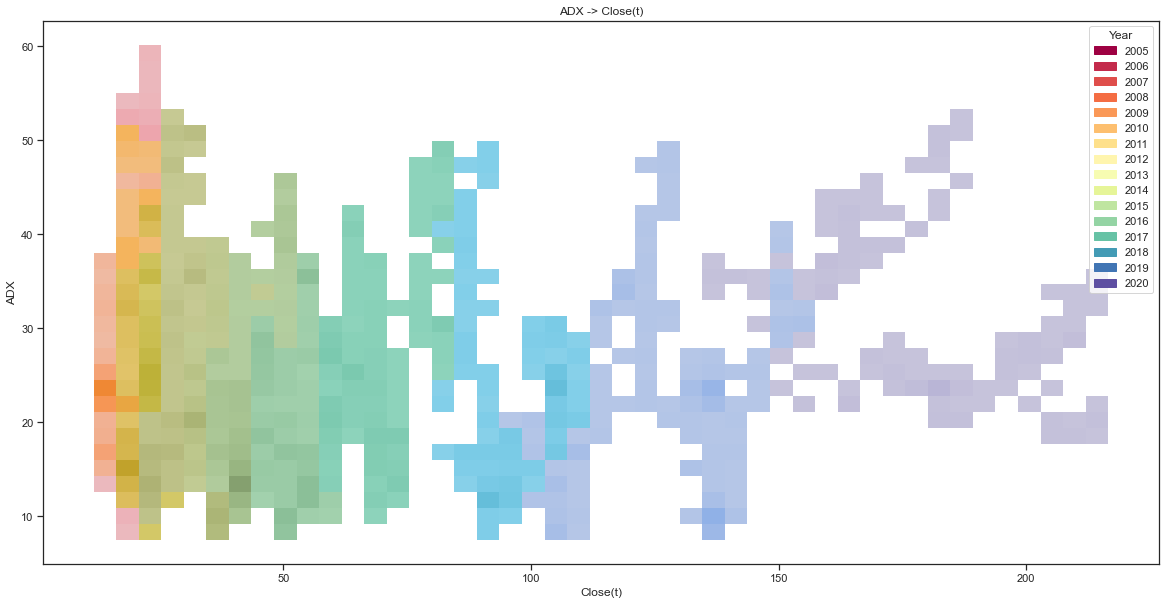

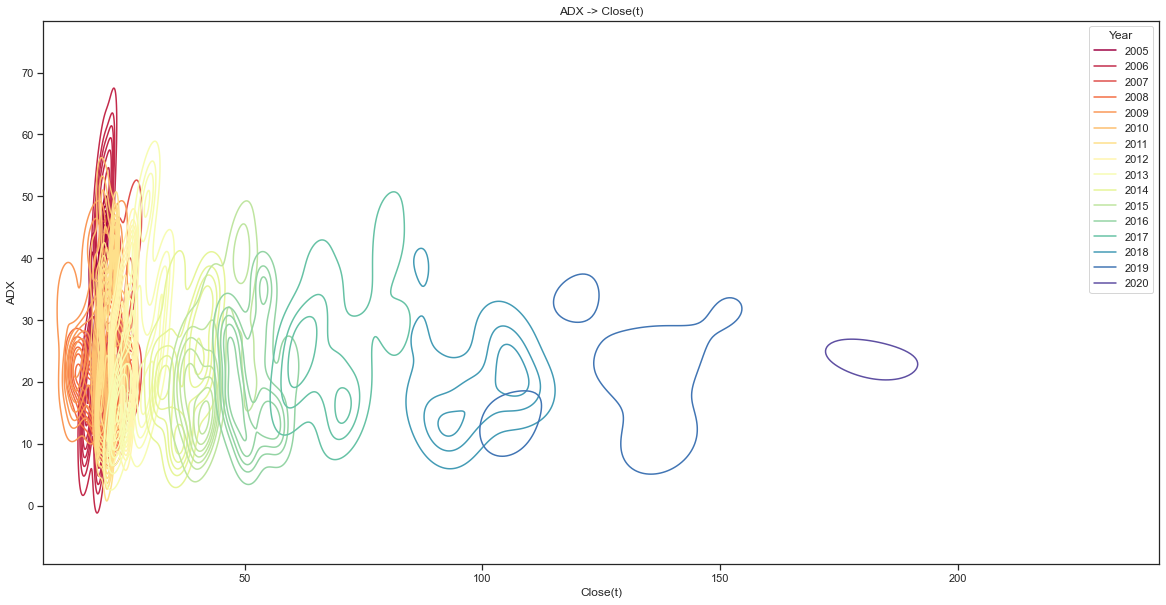

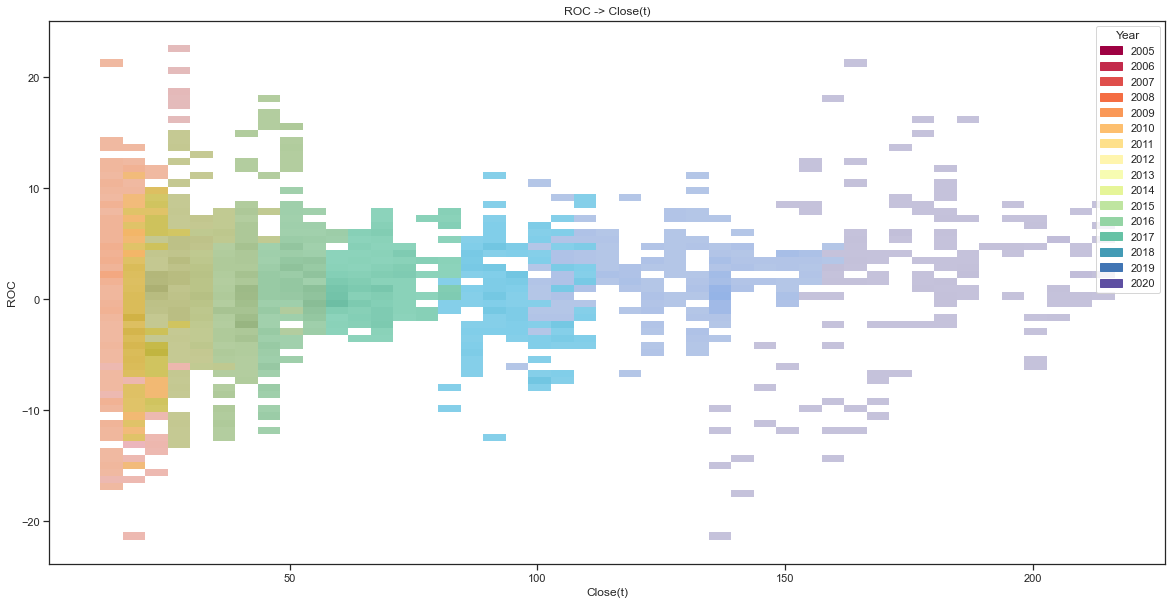

/Users/resurrectiontent/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


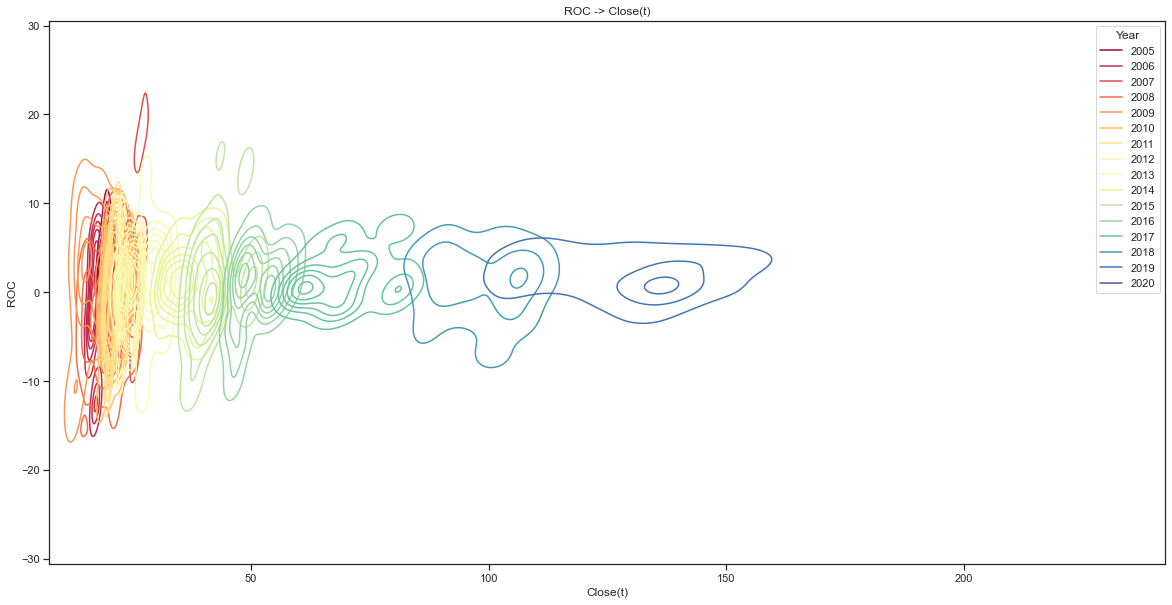

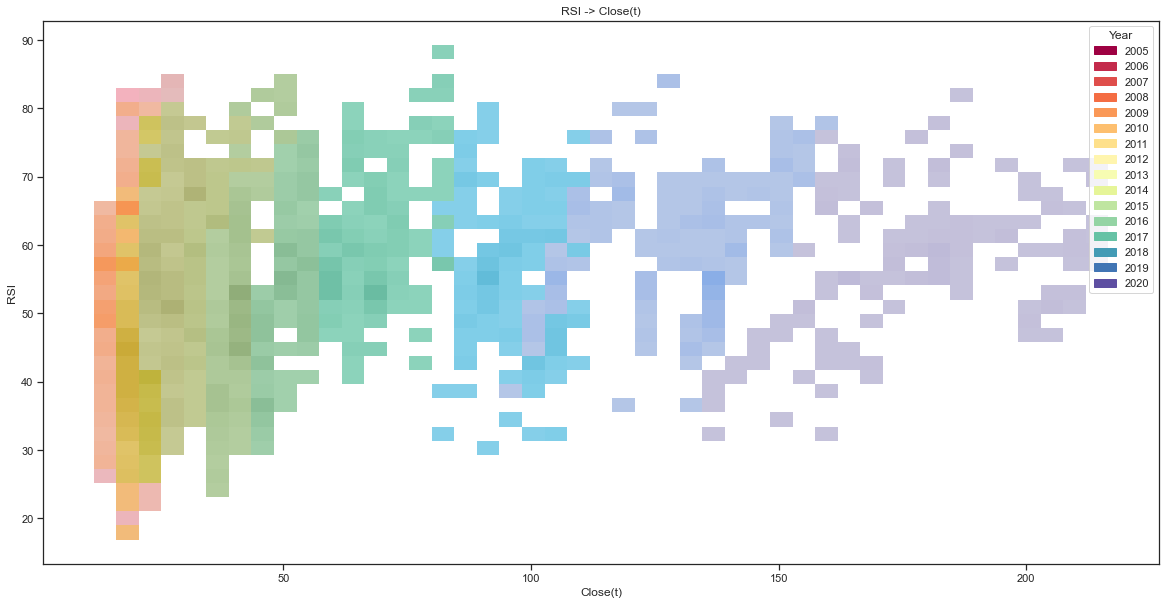

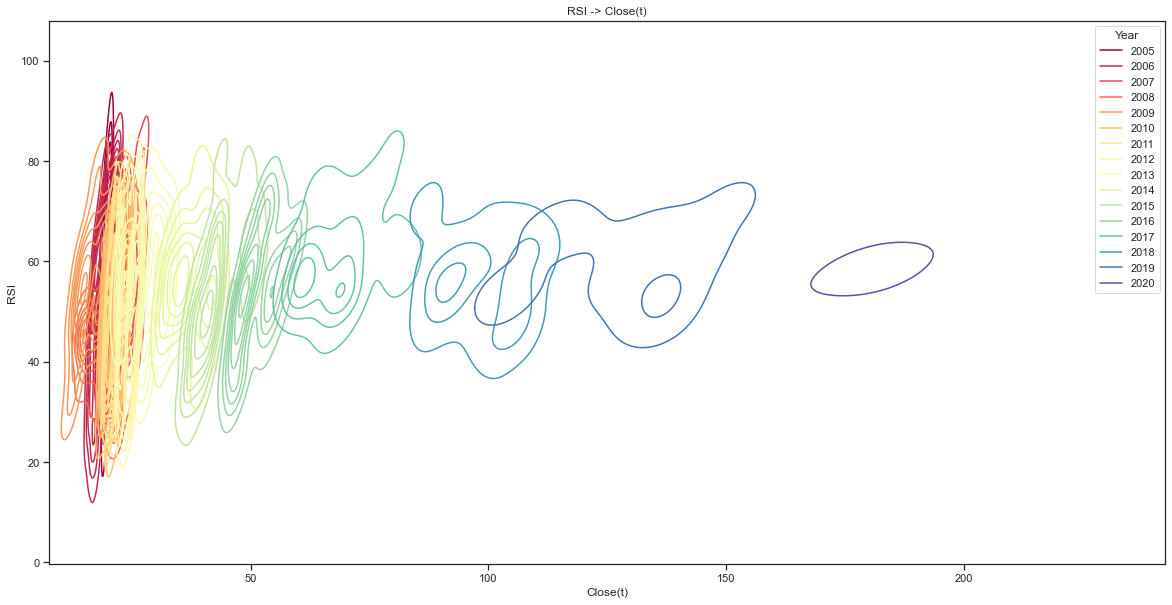

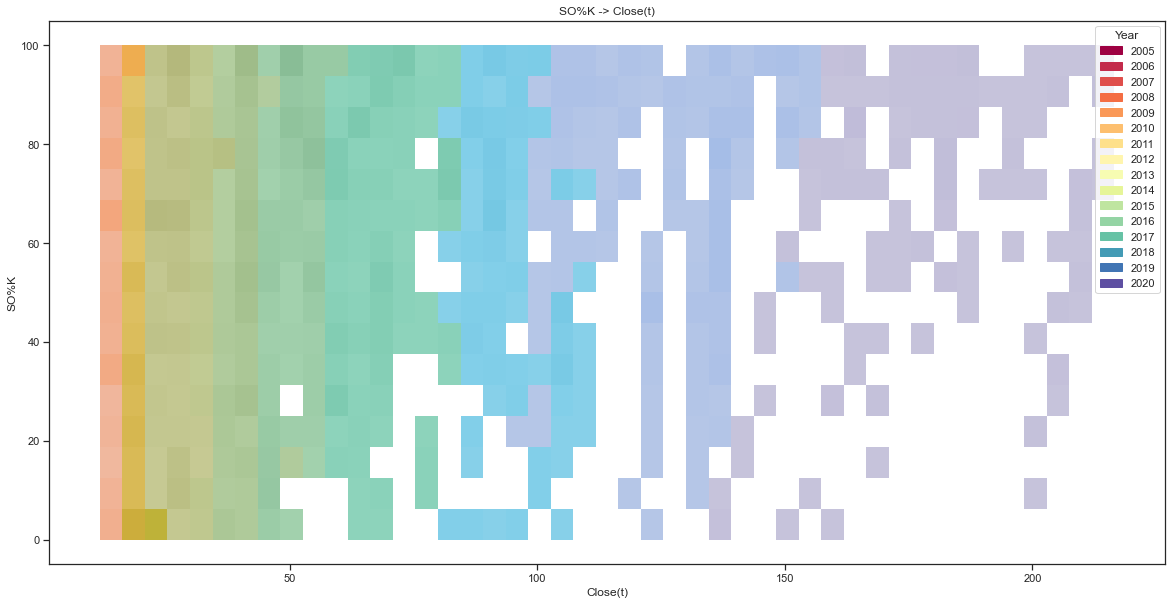

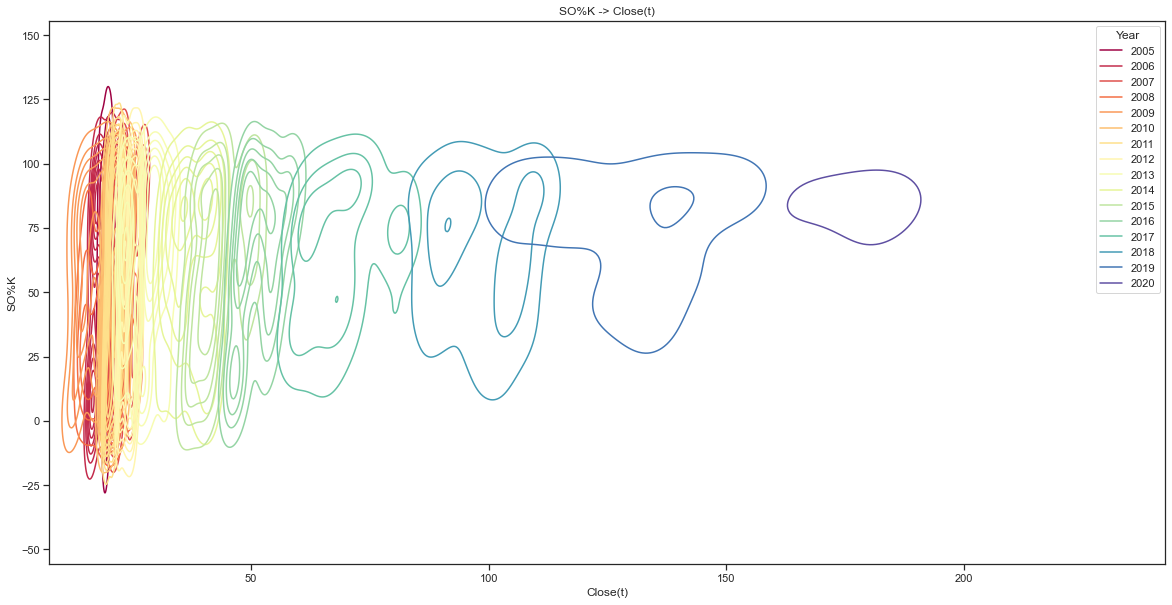

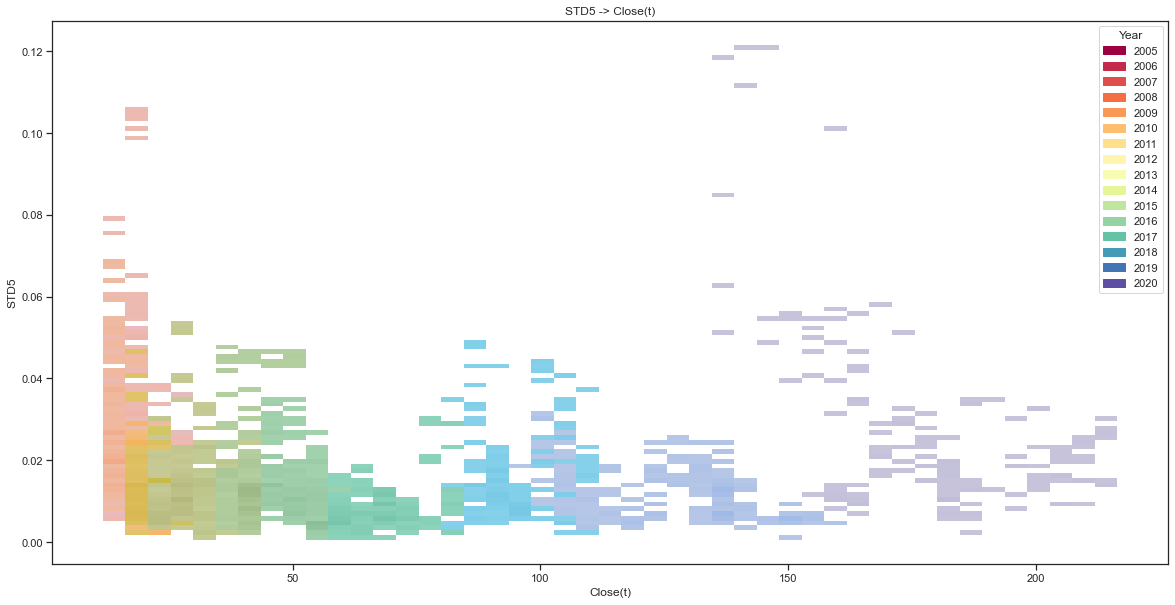

/Users/resurrectiontent/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


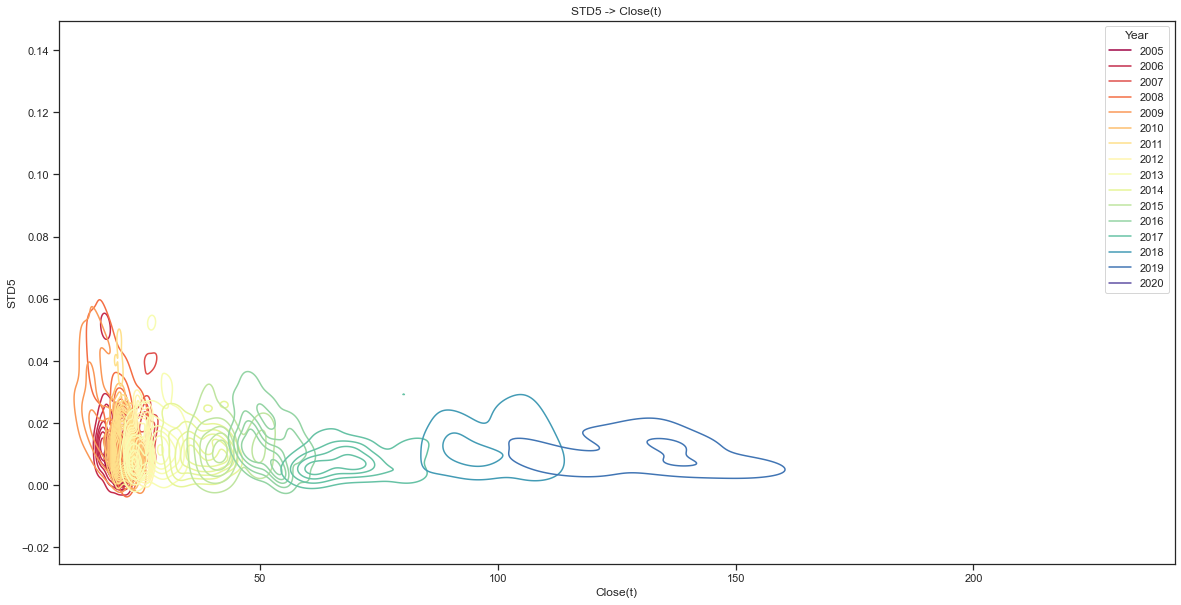

In [7]:
for col in FEATURES:
    display_pdf_info(col)

# Step 2.
<i>You need to make an estimation of multivariate mathematical expectation and variance</i><br/>
Mathematical expectiation is formally the mean value

In [8]:
display(DataFrame({ 'Math. exp.': msft.mean(), 'Variance': msft.var()}))

,Math. exp.,Variance
Close(t),4.837556e+01,1.804951e+03
Year,2.012707e+03,1.844645e+01
Volume,4.823395e+07,8.887909e+14
Upper_Band,5.019215e+01,1.935224e+03
Lower_Band,4.558789e+01,1.558472e+03
ATR,1.014750e+00,1.499298e+00
ADX,2.402441e+01,9.867851e+01
ROC,7.656261e-01,2.075853e+01
RSI,5.446056e+01,1.378358e+02
SO%K,5.848742e+01,8.592806e+02


# Step 3.
<i>You need to make a non-parametric stimation of conditional distributions, mathematical expectations and variences</i><br/>
Firs define a convenient funcion for displaying results

In [9]:
def print_conditional(col):
    print(f'---\n{col.upper()}\n---')
    by_cats = msft.groupby(CATEGORIES)
    display(DataFrame({'Math. exp.': by_cats[col].mean(),\
                       'Variance': by_cats[col].var()}))
    
    grid = sns.FacetGrid(msft, col=CATEGORIES, margin_titles=True, col_wrap=4)
    grid.map(plt.hist, col)
    plt.show()

And apply it to every column

---
VOLUME
---


,Math. exp.,Variance
Year,,
2005,6.457239e+07,2.969018e+14
2006,6.706159e+07,2.000361e+15
2007,6.239719e+07,7.885842e+14
2008,8.417402e+07,1.261354e+15
2009,6.243119e+07,7.682091e+14
2010,6.306716e+07,6.145100e+14
2011,6.068366e+07,6.727688e+14
2012,4.793796e+07,3.118665e+14
2013,4.861547e+07,7.156334e+14


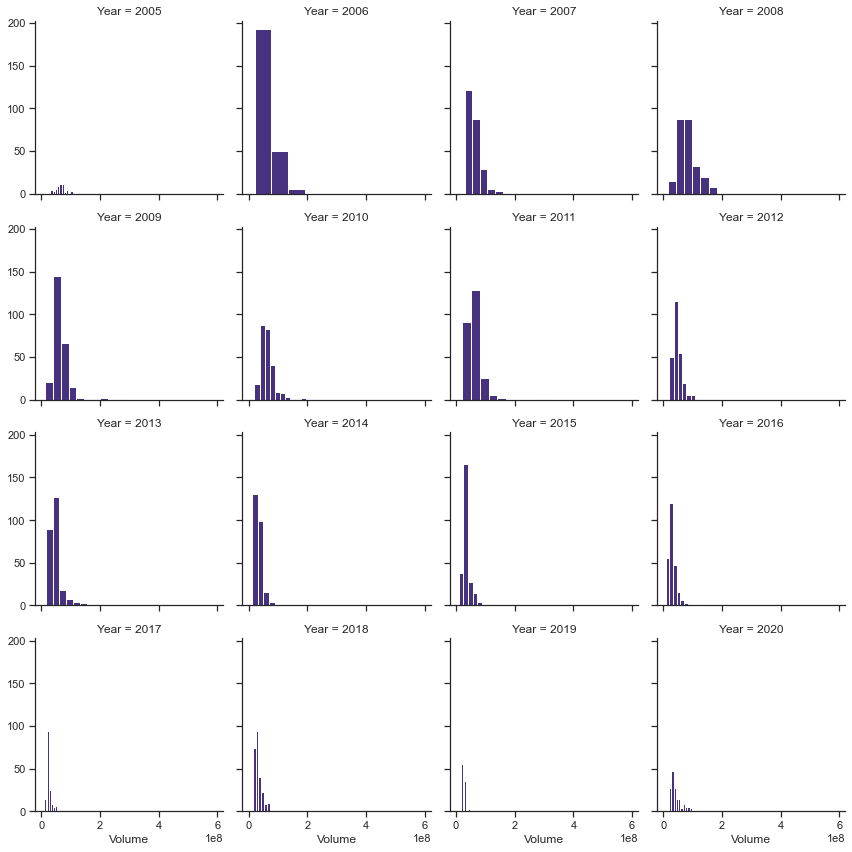

---
UPPER_BAND
---


,Math. exp.,Variance
Year,,
2005,20.132128,0.724315
2006,20.033165,2.225048
2007,23.596158,4.007341
2008,22.068725,7.869979
2009,18.609247,9.268085
2010,22.557986,2.882395
2011,22.070908,0.692913
2012,25.788123,1.370736
2013,28.819049,12.118883


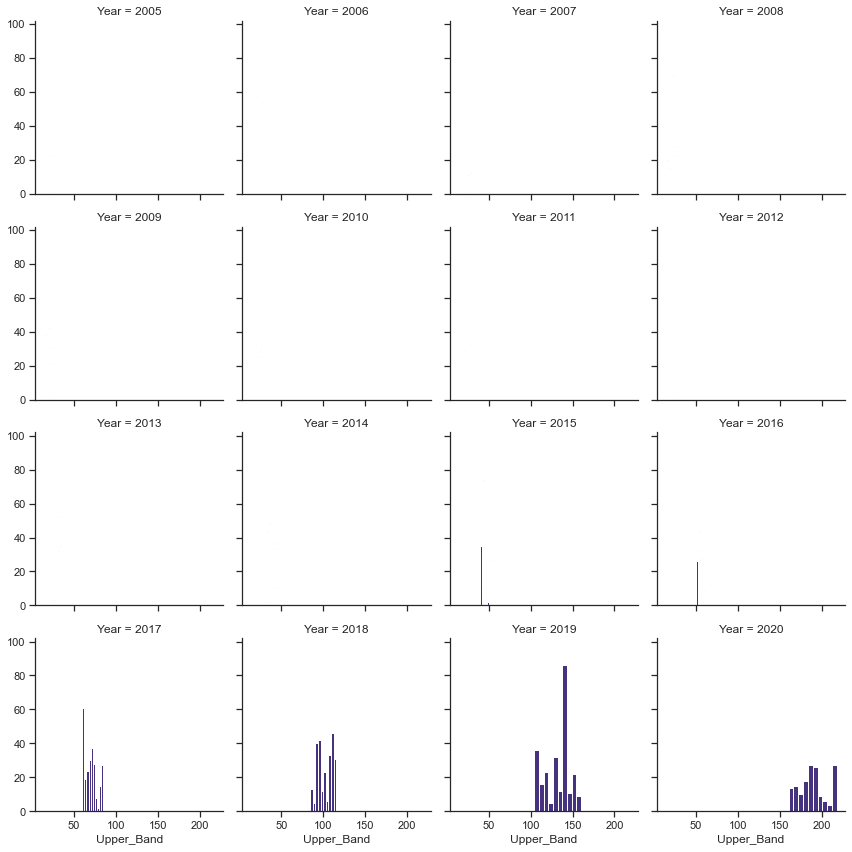

---
LOWER_BAND
---


,Math. exp.,Variance
Year,,
2005,18.415174,1.013521
2006,18.459509,3.179557
2007,21.497252,1.516419
2008,19.138840,8.236304
2009,16.340614,11.208339
2010,20.331538,2.966449
2011,20.173945,0.843359
2012,23.669885,2.019593
2013,26.173332,8.174482


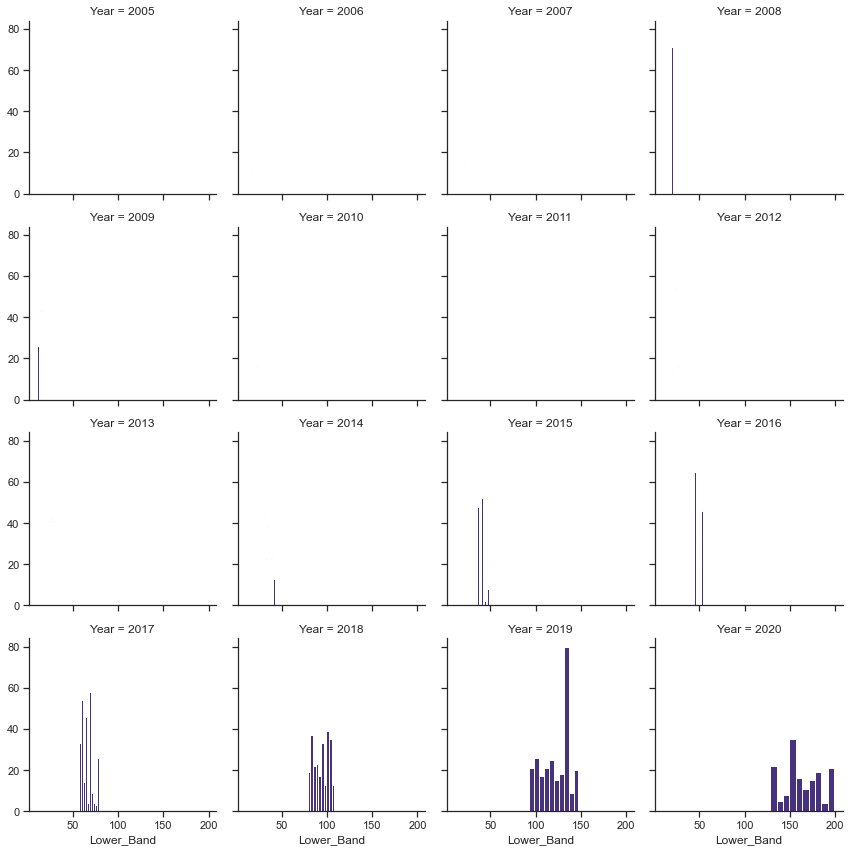

---
ATR
---


,Math. exp.,Variance
Year,,
2005,0.263732,0.000803
2006,0.309572,0.003044
2007,0.442073,0.013898
2008,0.722683,0.046106
2009,0.503376,0.008934
2010,0.452687,0.009064
2011,0.440544,0.010102
2012,0.443248,0.002617
2013,0.520521,0.012938


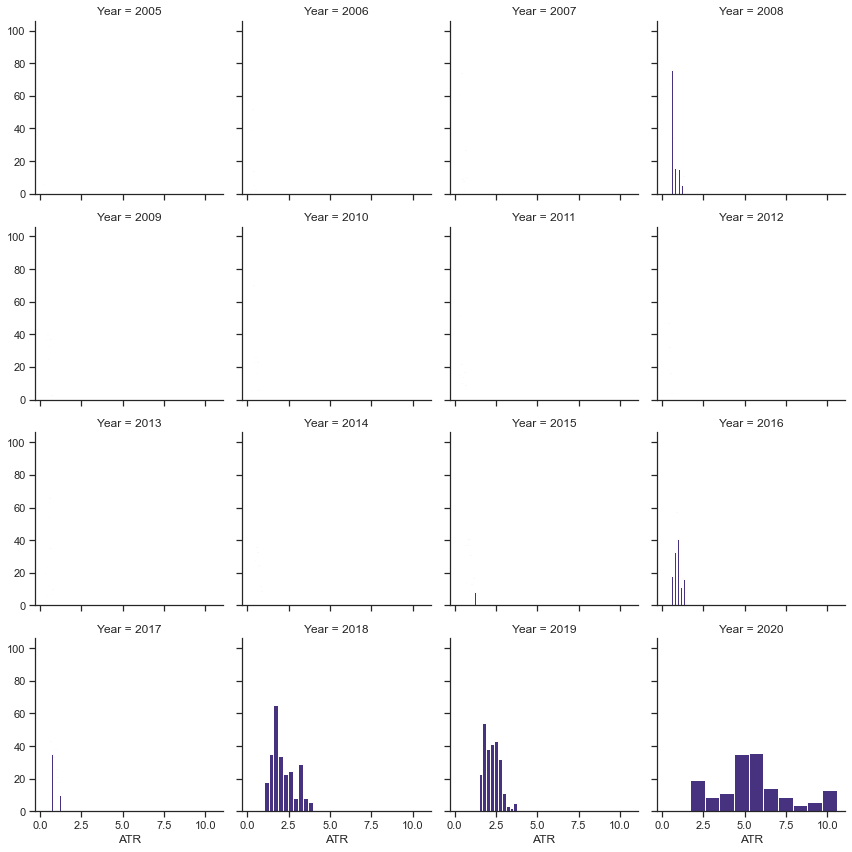

---
ADX
---


,Math. exp.,Variance
Year,,
2005,35.749215,29.507175
2006,28.086145,234.076885
2007,24.505743,64.183272
2008,18.286082,25.567720
2009,27.650921,66.707822
2010,26.976943,87.611522
2011,22.120424,92.060919
2012,23.922921,64.746716
2013,25.433759,141.516935


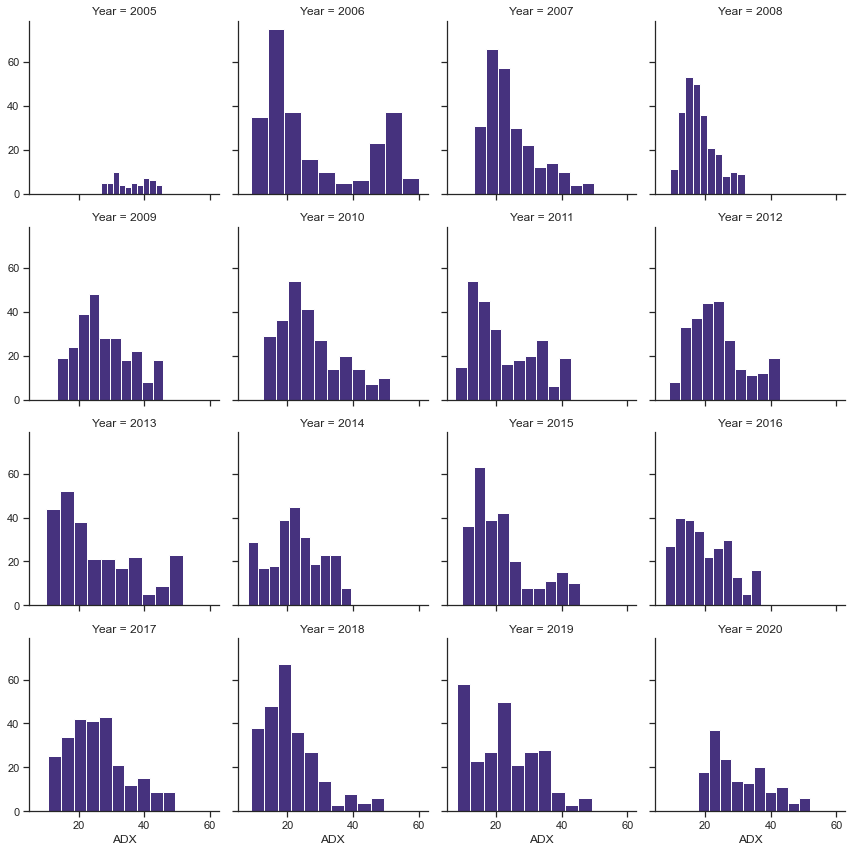

---
ROC
---


,Math. exp.,Variance
Year,,
2005,1.533915,15.561307
2006,0.616357,15.744979
2007,0.850986,22.004739
2008,-2.170267,31.238248
2009,2.147274,36.410919
2010,-0.169887,22.722204
2011,-0.124958,16.243705
2012,0.365733,13.819152
2013,1.440043,17.830865


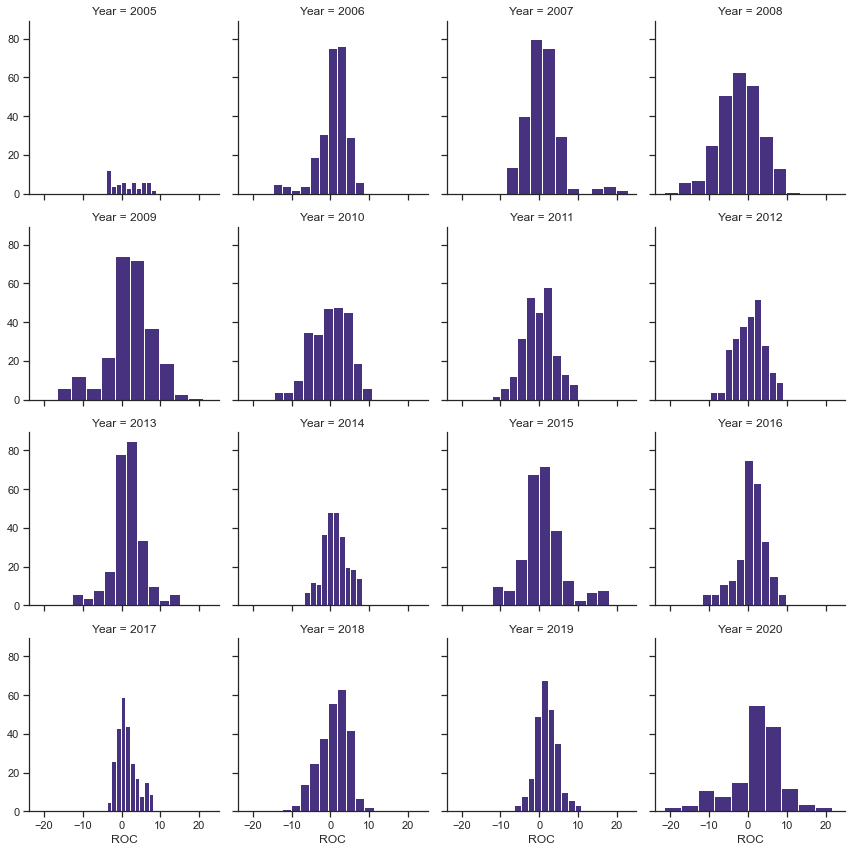

---
RSI
---


,Math. exp.,Variance
Year,,
2005,56.989004,276.683494
2006,55.120804,209.439732
2007,53.071996,130.733518
2008,44.954738,68.460463
2009,57.851543,114.426118
2010,50.396423,150.149441
2011,49.147730,108.928158
2012,51.867158,172.448693
2013,56.957184,107.665235


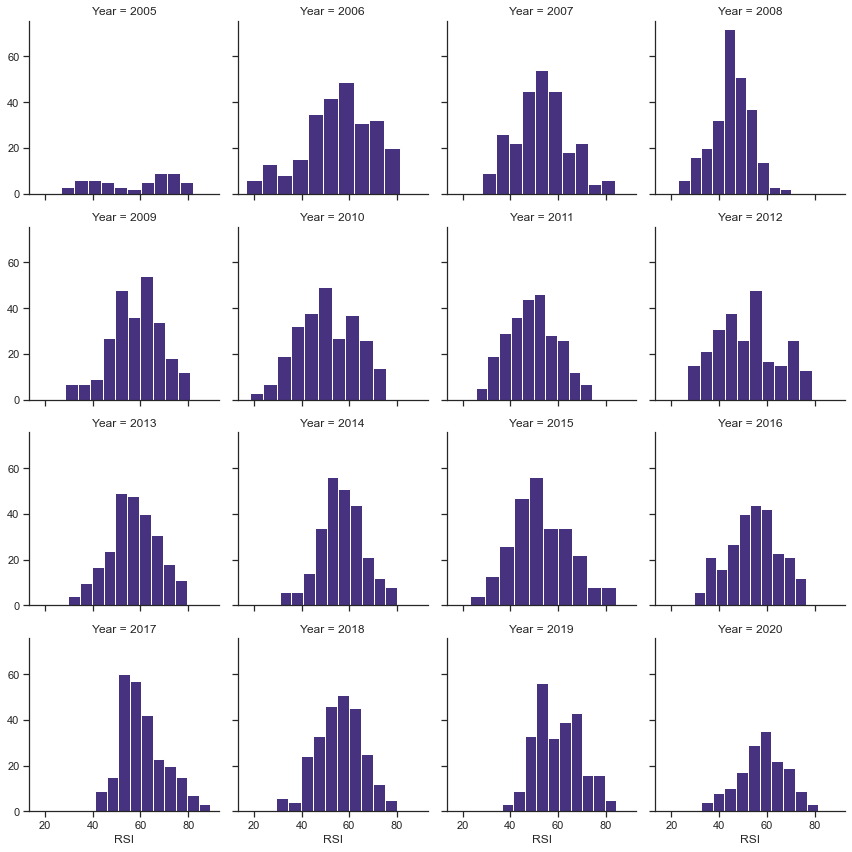

---
SO%K
---


,Math. exp.,Variance
Year,,
2005,56.981614,1337.498145
2006,58.718672,953.809813
2007,56.100468,890.598477
2008,39.430205,757.376991
2009,63.138221,740.717494
2010,52.374422,999.283214
2011,48.880782,944.588085
2012,52.695399,980.082173
2013,62.778958,725.823809


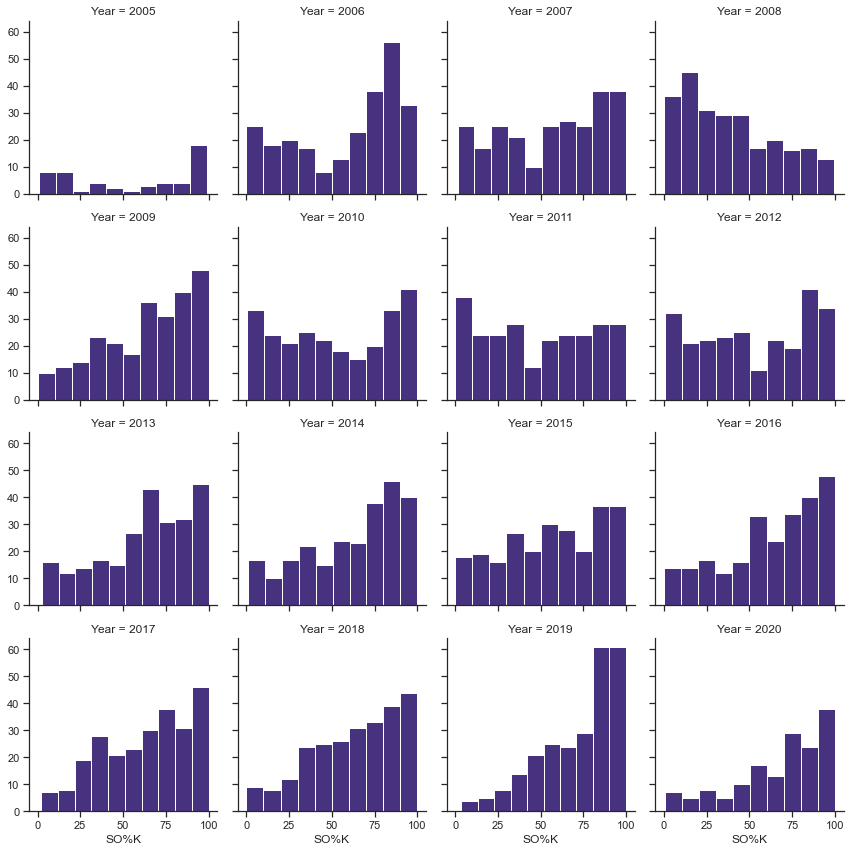

---
STD5
---


,Math. exp.,Variance
Year,,
2005,0.006552,0.000013
2006,0.010447,0.000059
2007,0.012782,0.000037
2008,0.026433,0.000327
2009,0.020182,0.000179
2010,0.012298,0.000032
2011,0.013486,0.000044
2012,0.011954,0.000027
2013,0.013162,0.000078


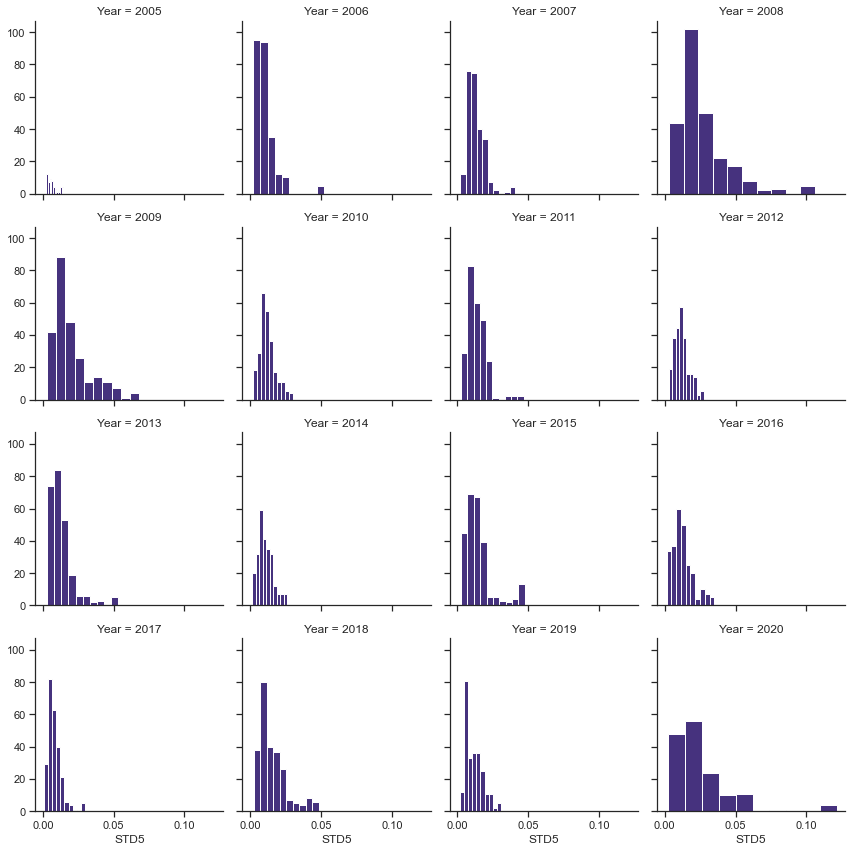

In [10]:
for col in FEATURES:
    print_conditional(col)

# Step 4.
<i>You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance level</i><br/>
First define several functions for convenient data collecting and diaplaying

In [11]:
def get_confidence_interval(cor, x, tol=0.95):
    cor_a = np.arctanh(cor)
    rate = 1 / np.sqrt(x.size-3)
    p = scipy.stats.norm.ppf(tol/2)
    p_l, p_h = cor_a - p * rate, cor_a + p * rate
    low, high = np.tanh((p_l, p_h))
    return low, high

def get_stats_row(col):
    cor, sig = scipy.stats.pearsonr(msft[TARGET], msft[col])
    low_conf, high_conf = get_confidence_interval(cor, msft[TARGET])
    return f'{cor:.5f}', f'{sig}', f'{low_conf:.4f}÷{high_conf:.4f}'

And apply them to form a table

In [12]:
display(DataFrame.from_records([[col, *get_stats_row(col)] for col in FEATURES],\
                            columns=["Column",\
                                     "Pair correlations coeff.",\
                                     "Significance lvl.",\
                                     "Confidence interval"]))

,Column,Pair correlations coeff.,Significance lvl.,Confidence interval
0,Volume,-0.37308,1.3926405178660707e-123,-0.3722÷-0.3740
1,Upper_Band,0.99735,0.0,0.9974÷0.9973
2,Lower_Band,0.99751,0.0,0.9975÷0.9975
3,ATR,0.82189,0.0,0.8222÷0.8216
4,ADX,0.03011,0.06588246712200542,0.0311÷0.0291
5,ROC,0.12847,3.3205600367512444e-15,0.1295÷0.1275
6,RSI,0.21976,4.774871188736485e-42,0.2207÷0.2188
7,SO%K,0.18934,1.8453494101215127e-31,0.1903÷0.1883
8,STD5,0.04543,0.005507790266816589,0.0465÷0.0444


# Step 5.
<i>Choose a task formulation for regression. Estimate multivariate correlation (target-predictors)</i>
#### Task formulation
<p>Try predicting target column <code>"Close(t)"</code> by columns <code>["ADX", "ROC", "RSI", "SO%K", "STD5"]</code></p><br/>
First view the correlations between features and the target column

<AxesSubplot:>

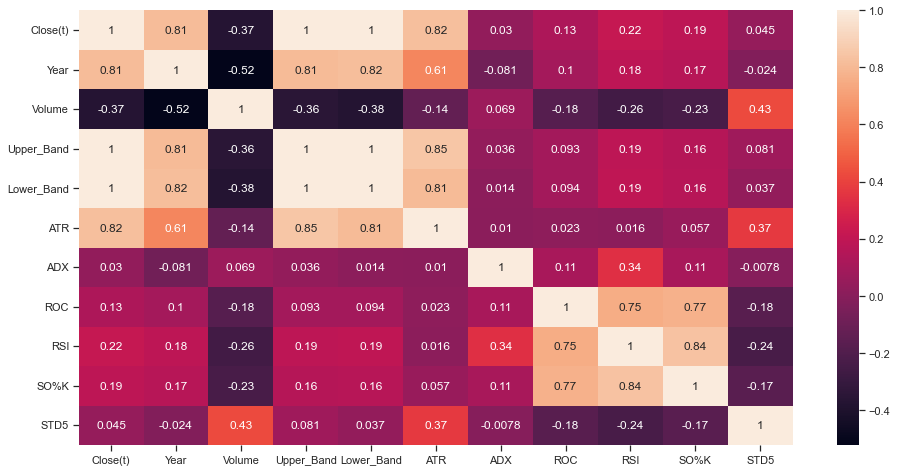

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(msft.corr(method='pearson'), annot=True)

# Step 6.
<i>Buid regression model and make an analysis of multicollinearity and regularization (if needed)</i><br/>
First divide the dataset on train and test parts, learn linear regression model and check its precesion

In [15]:
X = msft[FEATURES]
y = msft[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.275, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

Evaluate regression results

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('LINEAR REGRESSION RESULTS')
display(DataFrame.from_records([[mae, mse, mape]],\
                 columns=["Mean absolute error", "Mean squared error", "Mean absolute percentage error"]))

LINEAR REGRESSION RESULTS


,Mean absolute error,Mean squared error,Mean absolute percentage error
0,0.883917,3.303009,2.488293


The error is pretty low, so this regression can be enough

# Step 7.
<i>Analyze the quality of regression model (distribution of reseiduals, distribution coefficient)</i><br/>
First calculate the reseiduals vector, its characteristics and decide whether the distribution is normal or not

In [20]:
reseiduals = y_test - y_pred
display(DataFrame({'Mean': [reseiduals.mean()], 'Var': [reseiduals.var()]}))

,Mean,Var
0,-0.152665,3.282899


In [28]:
_, pvalue = scipy.stats.shapiro(reseiduals)
print(f'The distribution is{" not" if pvalue < 0.05 else ""} even')

The distribution is not even


Visualize the residuals

<AxesSubplot:ylabel='Close(t)'>

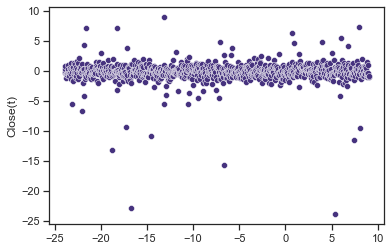

In [49]:
sns.scatterplot(x=np.linspace(reseiduals.min(), reseiduals.max(), len(reseiduals)), y=reseiduals)

And their distribution

<AxesSubplot:xlabel='Close(t)', ylabel='Count'>

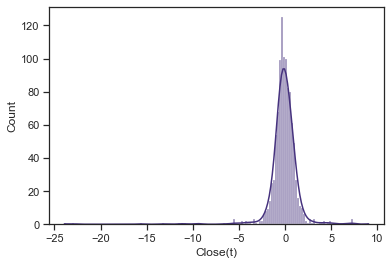

In [54]:
sns.histplot(reseiduals, kde=True)